## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

Number of samples in the training dataset

In [2]:
x_train.shape[0]

60000

Number of samples in the test dataset

In [3]:
x_test.shape[0]

10000

### Find dimensions of an image in the dataset

Height and width of the image in pixels:

In [4]:
x_train.shape[1:3]

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [5]:
import keras
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
y_train.shape

(60000, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [8]:
# pixel value 0 indicates black and pixel value 255 indicates white color
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [9]:
# (number of samples / batch_size, image_height, image_width, number of channels)
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_test.shape

(10000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [13]:
#Defining the model

model = Sequential()

model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

#Callbacks
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,verbose=1, mode='auto',min_delta=0.001)
callback_list = [early_stopping]

#Train the model
model.fit(x_train, y_train, batch_size=500, epochs=20, validation_data=(x_test,y_test),callbacks=callback_list)


Epoch 1/20
120/120 [==============================] - 5s 19ms/step - loss: 0.8351 - accuracy: 0.7126 - val_loss: 0.3966 - val_accuracy: 0.8602
Epoch 2/20
120/120 [==============================] - 2s 16ms/step - loss: 0.3501 - accuracy: 0.8742 - val_loss: 0.3226 - val_accuracy: 0.8878
Epoch 3/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2773 - accuracy: 0.9007 - val_loss: 0.2974 - val_accuracy: 0.8910
Epoch 4/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2440 - accuracy: 0.9134 - val_loss: 0.2906 - val_accuracy: 0.8948
Epoch 5/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2165 - accuracy: 0.9213 - val_loss: 0.2873 - val_accuracy: 0.8965
Epoch 6/20
120/120 [==============================] - 2s 16ms/step - loss: 0.1861 - accuracy: 0.9328 - val_loss: 0.2651 - val_accuracy: 0.9061
Epoch 7/20
120/120 [==============================] - 2s 16ms/step - loss: 0.1672 - accuracy: 0.9397 - val_loss: 0.2591 - val_accuracy: 0.9090

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [15]:
#Defining the model

model2 = Sequential()

model2.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model2.add(Convolution2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

#Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

#Callbacks
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,verbose=1, mode='auto',min_delta=0.001)
callback_list = [early_stopping]

#Train the model
model2.fit(x_train, y_train, batch_size=500, epochs=20, validation_data=(x_test,y_test),callbacks=callback_list)


Epoch 1/20
120/120 [==============================] - 2s 16ms/step - loss: 0.8928 - accuracy: 0.7059 - val_loss: 0.4400 - val_accuracy: 0.8441
Epoch 2/20
120/120 [==============================] - 2s 15ms/step - loss: 0.3884 - accuracy: 0.8613 - val_loss: 0.3441 - val_accuracy: 0.8809
Epoch 3/20
120/120 [==============================] - 2s 15ms/step - loss: 0.3225 - accuracy: 0.8853 - val_loss: 0.3095 - val_accuracy: 0.8902
Epoch 4/20
120/120 [==============================] - 2s 15ms/step - loss: 0.2873 - accuracy: 0.8974 - val_loss: 0.2989 - val_accuracy: 0.8950
Epoch 5/20
120/120 [==============================] - 2s 15ms/step - loss: 0.2597 - accuracy: 0.9065 - val_loss: 0.2737 - val_accuracy: 0.9026
Epoch 6/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2345 - accuracy: 0.9140 - val_loss: 0.2640 - val_accuracy: 0.9077
Epoch 7/20
120/120 [==============================] - 2s 15ms/step - loss: 0.2241 - accuracy: 0.9175 - val_loss: 0.2495 - val_accuracy: 0.9084

In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [17]:
from keras.preprocessing.image import ImageDataGenerator

#Generating batch of image data with real-time data augmentation
#additional details provided along with comments - added for info

datagen = ImageDataGenerator(
    featurewise_center=False,  #setting the input mean to be 0 over the dataset
    samplewise_center=False, #setting each sample mean to 0
    featurewise_std_normalization=False, #divide inputs by standard deviation of the dataset
    samplewise_std_normalization=False, #dividing each input by its std
    zca_whitening=False, #applying ZCA whitening
    rotation_range=50, #randomly rotate images in the range(0 to 180 degrees)
    width_shift_range=0.1, #randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, #randomly shift images vertically (fraction of total width)
    horizontal_flip=False, #randomly flip images horizontally
    vertical_flip=False #randomly flip images vertically
)

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

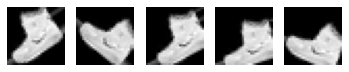

In [18]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [19]:
#Defining the model

model3 = Sequential()

model3.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model3.add(Convolution2D(32, (3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

#Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

#Callbacks
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,verbose=1, mode='auto',min_delta=0.001)
callback_list = [early_stopping]

#Train the model
model3.fit_generator(datagen.flow(x_train, y_train, batch_size=100),
                    steps_per_epoch = x_train.shape[0]/100,
                    epochs=20,
                    validation_data=(x_test,y_test),
                    callbacks=callback_list
                   )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
600/600 [==============================] - 15s 25ms/step - loss: 1.1001 - accuracy: 0.5947 - val_loss: 0.6171 - val_accuracy: 0.7747
Epoch 2/20
600/600 [==============================] - 14s 23ms/step - loss: 0.6463 - accuracy: 0.7603 - val_loss: 0.5137 - val_accuracy: 0.8047
Epoch 3/20
600/600 [==============================] - 14s 23ms/step - loss: 0.5678 - accuracy: 0.7857 - val_loss: 0.4818 - val_accuracy: 0.8286
Epoch 4/20
600/600 [==============================] - 14s 24ms/step - loss: 0.5235 - accuracy: 0.8048 - val_loss: 0.4705 - val_accuracy: 0.8274
Epoch 5/20
600/600 [==============================] - 14s 23ms/step - loss: 0.4934 - accuracy: 0.8138 - val_loss: 0.4398 - val_accuracy: 0.8407
Epoch 6/20
600/600 [==============================] - 14s 23ms/step - loss: 0.4687 - accuracy: 0.8259 - val_loss: 0.4319 - val_accuracy: 0.8422
Epoch 7/20
600/600 [==============================] - 14s 23ms/step - loss: 0.4477 - accuracy: 0.8329 - val_loss: 0.3916 - val_accuracy:

###  Report the final train and validation accuracy

In [20]:
model3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8758


[0.34120509028434753, 0.8758000135421753]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [21]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [22]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [23]:
datagen = ImageDataGenerator(
    featurewise_center=False,  #setting the input mean to be 0 over the dataset
    samplewise_center=False, #setting each sample mean to 0
    featurewise_std_normalization=False, #divide inputs by standard deviation of the dataset
    samplewise_std_normalization=False, #dividing each input by its std
    zca_whitening=False, #applying ZCA whitening
    rotation_range=50, #randomly rotate images in the range(0 to 180 degrees)
    width_shift_range=0.1, #randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, #randomly shift images vertically (fraction of total width)
    horizontal_flip=True, #randomly flip images horizontally
    vertical_flip=True #randomly flip images vertically
)

### **Prepare/fit the generator.**

In [24]:
# Prepare the generator
datagen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

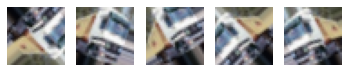

In [26]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().astype('uint8').squeeze())
    plt.plot()
plt.show()